In [1]:
#import library
import numpy as np
import pandas as pd

#to ensure we have consistent results
np.random.seed(42)

In [2]:
#Load the dataset
print('==> Loading the dataset...')
insurance=pd.read_csv("dataset2.csv")
print('done\n')

==> Loading the dataset...
done



In [3]:
insurance.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [4]:
#display dataset
insurance
#display first 5 rows
insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,0,0,0,0,0,86.5,0,-29.0,9.57,81.0
1,0,0,0,0,0,86.5,0,-29.0,9.57,71.0
2,1,0,1,1,0,65.0,1,-37.5,29.70,32.0
3,1,0,1,1,0,60.0,1,-37.5,23.76,32.0
4,1,0,1,1,0,79.0,2,-19.8,11.88,41.0


In [5]:
#Split the data set into the input matrix and output vector
x= insurance.drop('Net Sales', axis=1)
y=insurance['Net Sales']

In [6]:
#display x 
#Dataset that have remove column Claim
x

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Commision (in value),Age
0,0,0,0,0,0,86.5,0,9.57,81.0
1,0,0,0,0,0,86.5,0,9.57,71.0
2,1,0,1,1,0,65.0,1,29.70,32.0
3,1,0,1,1,0,60.0,1,23.76,32.0
4,1,0,1,1,0,79.0,2,11.88,41.0
...,...,...,...,...,...,...,...,...,...
63321,2,1,1,3,0,86.5,10,12.25,31.0
63322,2,1,1,3,0,58.0,14,14.00,40.0
63323,2,1,1,3,0,2.0,0,6.30,57.0
63324,2,1,1,3,0,3.0,7,6.30,63.0


In [7]:
#display the vector y[what we want to predict]
#column 'Net Sales' only
y

0       -29.0
1       -29.0
2       -37.5
3       -37.5
4       -19.8
         ... 
63321    35.0
63322    40.0
63323    18.0
63324    18.0
63325    26.0
Name: Net Sales, Length: 63326, dtype: float64

In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 63326 entries, 0 to 63325
Series name: Net Sales
Non-Null Count  Dtype  
--------------  -----  
63326 non-null  float64
dtypes: float64(1)
memory usage: 494.9 KB


In [9]:
pd.Series.y('Claim'==1).values

AttributeError: type object 'Series' has no attribute 'y'

In [10]:
#Split the dataset into training and testing set
#80% training set
#20% test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=30)

In [11]:
#Standardize numeric data and normalize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=False)
scaler.fit(x_train)
x_train=scaler.transform(x_train)

In [12]:
y_train = y_train.values;  #convert to numpy array
#print the total number of rows and column
print('x_train.shape:', x_train.shape) 
print('y_train shape:', y_train.shape)

x_train.shape: (50660, 9)
y_train shape: (50660,)


# Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
#use train dataset
lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred=lin_reg.predict(x_train)
#predict using the same training data
#y_train should be similar to y_predict
#predict value similar to the actual value

In [15]:
def show10results(y_train, y_pred):
    print('Result for the 10 random samples: ')
    selected = np.random.randint(0, len(y_train), 10)
    for i in selected:
        print('actual = {:7.0f} pred ={:7.0f}'.format(y_train[i], y_pred[i]))

y_pred=lin_reg.predict(x_train)#predict
show10results(y_train, y_pred)

Result for the 10 random samples: 
actual =       0 pred =     34
actual =      10 pred =     24
actual =      20 pred =     27
actual =      10 pred =     27
actual =      13 pred =     26
actual =      86 pred =     91
actual =      30 pred =     25
actual =      32 pred =     33
actual =      16 pred =     26
actual =      13 pred =     37


In [16]:
#calculate root mean square error
from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error(y_pred, y_train)
lin_rmse=np.sqrt(lin_mse)
print('RMSE =', lin_rmse)

RMSE = 22.077179402157668


In [17]:
insurance['Net Sales'].mean()

34.51616397688176

In [19]:
#cross validation predict
from sklearn.model_selection import cross_val_predict

# Exercise: perform cross-validatied prediction using cross_val_predict
y_pred_cv = cross_val_predict(lin_reg, x_train, y_train, cv=3)

In [20]:
def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])

In [21]:
peek_results(y_train, y_pred_cv)

actual |  Predicted
------------------
21.0  | 28.329635087391182
41.0  | 29.44852211268201
39.6  | 38.95260952056465
31.0  | 27.11005833979837
20.0  | 26.504411006858106
20.0  | 24.202413620185574
16.0  | 33.23760922648137
79.2  | 58.61504674391154
-29.7  | 33.73795741374646
11.0  | 26.443247483213508
59.4  | 46.898297619563124
62.0  | 30.087440564199955
62.0  | 42.28607061485717
80.0  | 31.330645317626733
45.0  | 33.831957328872214
10.0  | 26.780736950552395
14.0  | 25.580602433017347
10.0  | 22.313897706540832
39.6  | 44.740375477412265
22.0  | 26.260617524417516


In [22]:
y_train=pd.DataFrame(y_train)
y_pred_cv=pd.DataFrame(y_pred_cv)

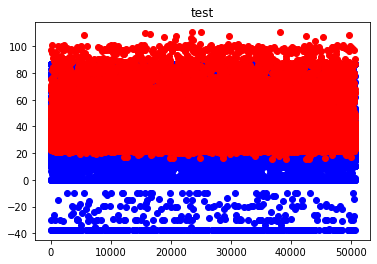

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_train,y_pred_cv,regressorName):
    if max(y_train) >= max(y_pred_cv):
        my_range = int(max(y_train))
    else:
        my_range = int(max(y_pred_cv))
    plt.scatter(range(len(y_train)), y_train, color='blue')
    plt.scatter(range(len(y_pred_cv)), y_pred_cv, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_train, y_pred_cv, "test")